# Previsão de vôos atrasados usando Machine Learning

<i>Baixando arquivos CSV e salvando-os como <b>flightdata.csv</b></i>

In [6]:
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flighdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1552k  100 1552k    0     0  2234k      0 --:--:-- --:--:-- --:--:-- 2234k


## Dicionário de Variáveis

Esse arquivo csv possui 26 colunas. São elas:

* <b>YEAR</b>: o ano em que o voo foi realizado
 * 2016
* <b>QUARTER</b>: o trimestre 
 * 1-4
* <b>MONTH</b>: o mês 
 * janeiro a dezembro (1-12)
* <b>DAY_OF_MONTH</b>: o dia do mês 
 * 1-31
* <b>DAY_OF_WEEK</b>: o dia da semana
 *  1= segunda, 2= terça, etc
* <b>UNIQUE_CARRIER</b>: código da operadora de companhia
 * por exemplo DL
* <b>TAIL_NUM</b>: número da causa da aeronave
* <b>FL_NUM</b>: número do voo
* <b>ORIGIN_AIRPORT_ID</b>: ID de aeroporto de origem
* <b>ORIGIN</b>: código do aeroporto de origem
 * ATL, DFW, SEA, etc
* <b>DEST_AIRPORT_ID</b>: ID do aeroporto de destino
* <b>DEST</b>: código do aeroporto de destino
 * ATL, DFW, SEA, etc
* <b>CRS_DEP_TIME</b>: hora de partida agendada
* <b>DEP_TIME</b>: hora de partida real
* <b>DEP_DELAY</b>: número de minutos em que a partida foi atrasada
* <b>DEP_DEL15</b>: 0 ou 1
 * 0 = partida atrasada em menos de 15 minutos
 * 1 = partida atrasada em 15 minutos ou mais
* <b>CRS_ARR_TIME</b>: hora de chegada agendada
* <b>ARR_TIME</b>: hora de chegada real
* <b>ARR_DELAY</b>: número em minutos em que a chegada do voo atrasou
* <b>ARR_DELAY</b>: 0 ou 1
 * 0 = chegou com menos de 15 minutos de atrsado
 * 1 = chegou com 15 minutos de atrsado ou mais
* <b>CANCELLED</b>: 0 ou 1
 * 0 = o voo não foi cancelado
 * 1 = o voo foi cancelado
* <b>DIVERTED</b>: 0 ou 1
 * 0 = o voo não foi desviado
 * 1 = o voo foi desviado
* <b>CRS_ELAPSED_TIME</b>: tempo de voo agendado em minutos
* <b>ACTUAL_ELAPSED_TIME</b>: tempo de voo real em minutos
* <b>DISTANCE</b>: distância percorrida em milhas

## Análise Exploratória dos Dados

O conjunto de dados contém 11.000 linhas e 26 colunas. Como você pode ver abaixo, os dados podem ser agrupados por vários critérios como ano, mês, id de destino ou origem.

In [7]:
import pandas as pd

df = pd.read_csv('flighdata.csv')
# ver as 5 primeiras entradas do dataset
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


<i>O conjunto de dados</i>



&nbsp;

## Limpando e Preparando os Dados

1. Verificando se há valores ausentes.

In [8]:
df.isnull().values.any()

True

<i>Há pelo menos um valor ausente em algum lugar no conjunto de dados.</i>


2. Descobrir <b>onde</b> estão os valores ausentes.

In [9]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

<i>O número de valores ausentes em cada coluna</i>

3. A 26ª coluna ("Sem nome: 25") contém 11.231 valores ausentes que é igual ao número de linhas no conjunto total de dados. O que isso significa? Essa coluna foi criada por engano, porque o arquivo CSV contém uma vírgula no final de cada linha. Removendo-o.

In [10]:
df = df.drop('Unnamed: 25', axis=1)
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

4. Ainda contém muitos valores ausentes no DataFrame que não são úteis porque as colunas não são relevantes pra esse modelo de aprendizagem. O objetivo desse modelo é prever se um voo que estou pensando em reservar chegará no horário ou não. <br/>Portanto, é a próxima etapa filtrar o conjunto de dados para eliminar as colunas que não são relevantes para um modelo preditivo. Por exemplo, o número da cauda da aeronave provavelmente tem pouca influência na pontualidade de um voo e, no momento em que reserva uma passagem, você não tem como saber se um voo será cancelado, desviado ou atrasado. Por outro lado, a hora de partida agendada pode ter muita influência sobre a pontualidade da chegada. Por causa do sistema de hub e spoke usado pela maioria das companhias aéreas, os voos matinais tendem a chegar no horário mais frequentemente do que aqueles vespertinos ou noturnos. E em alguns dos principais aeroportos, o tráfego se acumula durante o dia, aumentando a probabilidade de que voos em horários mais próximos do fim do dia se atrasem.


In [11]:
df=df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

<i>O DataFrame filtrado</i>

5. A coluna ARR_DEL15 ainda contém valores ausentes (utilizando 0s para identificar os voos que chegaram na hora e 1s para voos que atrasaram). A seguir representaremos valores ausentes com <b>NaN</b>, que significa <i>não é um número</i>. 

In [12]:
df[df.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


6. O motivo pelo que ainda há valores no ARR_DEL15 ausentes nessa linha é que todos eles correspondem aos voos que foram cancelados ou desviados. Mas já que um voo que é cancelado ou desviado para outro aeroporto pode ser considerado "atrasado", usaremos um método para substituir os valores ausentes por 1s e isso fará a identificação dos voos que sofreram atraso.

In [13]:
df=df.fillna({'ARR_DEL15' : 1})
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


<i>NaNs substituídos por 1s</i>

O conjunto de dados agora está "limpo", no sentido de que valores ausentes foram substituídos e a lista de colunas foi reduzida para aquelas mais relevantes para o modelo.

A coluna CRS_DEP_TIME do conjunto de dados representa horários de partida agendados. A granularidade dos números nessa coluna (que contém mais de 500 valores exclusivos) pode ter um impacto negativo na precisão em um modelo de machine learning. Isso pode ser resolvido usando uma técnica chamada compartimentalização. E se eu dividir cada número nesta coluna por 100 e arredondar para baixo até o inteiro mais próximo? 1030 se tornará 10, 1925 se tornará 19 e assim por diante e você ficará com um máximo de 24 valores discretos nesta coluna. Intuitivamente, faz sentido, porque provavelmente não importa muito se um voo sai às 10:30 ou às 10:40. Mas faz muita diferença se ele sai às 10:30 ou às 17:30.

1. Observe que a coluna CRS_DEP_TIME contém valores de 0 a 2359 representando horários em formato de 24 horas.

In [14]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0


<i>O DataFrame com horários de partida não compartimentalizados.</i>

2. Compartimentalizando os horários de partida:

In [15]:
import math

for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


<i>O DataFrame com horários de partida compartimentalizados.</i>

3. Gerando colunas de indicador das colunas ORIGIN e DEST, removendo as colunas propriamente ditas. <br/> Você perceberá que o DataFrame resultante das colunas foram substituídas por colunas correspondentes para os códigos de aeroporto presentes nas colunas originais. As novas colunas têm 1s e 0s que indicam que determinado voo teve origem ou foi destinado ao aeroporto correspondente.

In [16]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


<i>O DataFrame com colunas de indicador. </i>

## Criando Modelo de ML

Na criação de um modelo de Machine Learning precisamos de dois conjuntos de dados: um para treinamento e outro para teste. Na prática, geralmente existe apenas um conjunto de dados, então ele é dividido em dois. Nesse modelo iremos executar uma divisão 80-20% no DataFrame. 

Eu também farei a separação do DataFrame em: <i>colunas de recursos</i> e <i>colunas de rótulos</i>. 
O que isso significa?

Nas colunas de recursos estão as <b>entradas</b> para o modelo (por exemplo, origem e destino do voo e a hora de partida agendada). Enquanto as colunas de rótulos contém os modelos de <b>previsão</b> — por exemplo a coluna ARR_DEL15, que indica se um voo chegará no horário.

In [17]:
# importando a função train test split do Scikit-learn
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)

<i>A terceira linha usa a função para dividir o DataFrame em um conjunto de treinamento que contém 80% dos dados originais e um conjunto de teste que contém 20% restantes. </i>

In [18]:
train_x.shape

(8984, 14)

In [19]:
test_x.shape

(2247, 14)

In [20]:
train_y.shape

(8984,)

In [21]:
test_y.shape

(2247,)

* Verificando o número de linhas e colunas no DataFrame que contém as colunas de recurso usadas para treinamento: <i>train_x.shape</i> e <i>train_y.shape</i>. <br/> E para teste: <i>test_x.shape</i> e <i>test_y.shape</i>

> Há diversos modelos de ML. Um dos mais comuns é o de regressão, o qual você pode observar no meu <a href="https://github.com/brunavent/Projetos-de-ML/blob/master/Mudancas_climaticas_nasa.ipynb" title="exemplo">Projeto de Mudanças Climáticas</a>. Esse modelo usa algoritmos específicos para produzir um alor numérico, por exemplo, a probabilidade de uma transação de cartão de crédio ser fradulenta. </br> Mas esse modelo atual que estou apresentando eu busco um conjunto de entradas em uma classificação entre um conjunto de saídas conhecidas. Não entendeu? Funciona como a caixa de entrada do seu e-mail que examina "spam" ou "não spam". É um modelo de classificação binário. Ele prevê se um voo chegará atrasado ou não, existindo duas possibilidades que caracterizam a binariedade.

A saída a seguir mostra os parâmetros usados no classificador, por exemplo <b>n_estimators</b>, que especifica o <i>número de árvores em cada floresta de árvores de decisão</i>, bem como <b>max_depth</b>, que especifica a <i>profundidade máxima das árvores de decisão</i>. Os valores são padrões mas podem ser alterados ao criar o objeto RandomForestClassifier.

In [22]:
# Criando um objeto RandomForestClassifier e treiná-lo chamando o método fit
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

<i>Treinamento do modelo</i>

#### Determinando precisão média do modelo

A precisão média é de 86%,que parece bom à primeira vista. No entanto... A precisão média nem sempre é um indicador confiável da precisão de um modelo de classificação. <br/><br/>Uma das melhores medidas gerais para um modelo de classificação binária é a <i>área sob a curva característica operacional do receptor</i> (ROC AUC). Confuso né? Eu vou tentar te resumir de uma forma que não fique confuso: é a capacidade com que o modelo fará uma previsão ou um diagnóstico corretos.

In [23]:
#chamando o métido predicted para testar o modelo usando valores em x
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8602581219403649

1. Antes de calcular o gráfico ROC AUC, devemos gerar probabilidades de previsão para o conjunto de testes. Probabilidades essas que são estimadas para cada uma das classes ou respostas que o modelo prevê. Por exemplo, [0.88199435, 0.11800565] significa que ha uma chance de 89% de um voo chegar no hário (ARR_DEL15 = 0) e uma chance de 12% de isso não ocorrer (ARR_DEL15 = 1). A soma das duas probabilidades resulta em 100%.

In [24]:
# Produzindo uma matriz de confusão
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

2. Gerando uma pontuação de ROC AUC das probabilidades usando o método do Scikit-learn:

In [25]:
roc_auc_score(test_y, probabilities[:, 1])

0.6743824904998539

3. A primeira linha na saída a seguir representa voos que chegaram no horário. A primeira coluna na linha mostra quantos voos foram previstos corretamente como chegando no horário, enquanto a segunda coluna revela quantos voos foram previstos como atrasados, mas não estavam. Com base nisso, o modelo parece apto a prever que um voo <b>chegará</b> no horário.

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[1882,   54],
       [ 260,   51]])

A segunda linha representa os voos que chegaram atrasados. Observe-a... <br/> A primeira coluna mostra quantos voos foram previstos <i>incorretamente</i> como chegando no horário. A segunda coluna, da segunda linha ainda, mostra quantos voos foram previstos <i>incorretamente</i> como chegando atrasados. Claramente, o modelo não está nem de longe tão apto a prever que um voo chegará atrasado quanto está para prever que um voo chegará no horário previsto. 

4. Outras medidas de precisão para um modelo de classificação incluem <b>precisão</b> e <b>recall</b>. Suponha que o modelo foi apresentado com três chegadas no horário e três chegadas em atraso e que ele previu corretamente duas das chegadas no horário, mas previu incorretamente que duas das chegadas em atraso ocorreriam no horário. Neste caso, a <i>precisão</i> seria de 50% (dois dos quatro voos que ele classificou como no horário chegaram realmente no horário), enquanto o <i>recall</i> seria de 67% (ele identificou corretamente duas das três chegadas no horário). 

In [27]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9972375690607734

<i>Medindo a precisão</i>

In [28]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.8650159744408946

<i>Medindo o recall</i>

## Visualizando a Saída do Modelo

In [29]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0, 0.5, 'Taxa Verdadeiro Positivo')

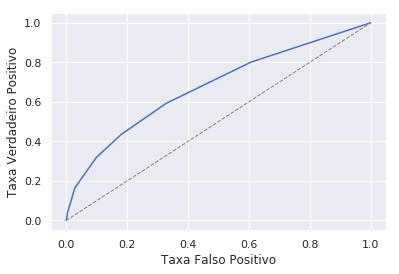

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('Taxa Falso Positivo')
plt.ylabel('Taxa Verdadeiro Positivo')

<i>Curva de ROC gerada com Matplotlib</i><br/>
A linha pontilhada representa uma chance de 50-50 de obter uma resposta correta. A curva azul representa a precisão do meu modelo. 

### Análise de Vários Voos

In [31]:
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime
    
    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Erro ao analisar data / hora - {}'.format(e)
    
    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour
    
    origin = origin.upper()
    destination = destination.upper()
    
    input = [{'MÊS': month,
              'DIA': day,
              'DIA_DA_SEMANA': day_of_week,
              'CRS_DEP_TEMPO': hour,
              'ORIGEM_ATL': 1 if origin =='ATL' else 0,
              'ORIGEM_DTW': 1 if origin =='DTW' else 0,
              'ORIGEM_JFK': 1 if origin =='JFK' else 0,
              'ORIGEM_MSP': 1 if origin =='MSP' else 0,
              'ORIGEM_SEA': 1 if origin =='SEA' else 0,
              'DEST_ATL': 1 if destination =='ATL' else 0,
              'DEST_DTW': 1 if destination =='DTW' else 0,
              'DEST_JFK': 1 if destination =='JFK' else 0,
              'DEST_MSP': 1 if destination =='MSP' else 0,
              'DEST_SEA': 1 if destination =='SEA' else 0 }]
    
    return model.predict_proba(pd.DataFrame(input))[0][0]

Qual a probabilidade de um voo de Nova York para Atlanta, na noite de 1º de outubro, chegar no horário?

In [32]:
predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

0.6

Modificando o código para calcular a probabilidade de que o mesmo voo, no dia seguinte, chegue no horário:

In [33]:
predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL')

0.6

<i>Se os seus planos de viagem fossem flexíveis, você consideraria adiar sua viagem em um dia, né?</i>

Agora, modificando o código para calcular a probabilidade de que um voo matutino de Atlanta a Seattle, no mesmo dia, chegue no horário:

In [34]:
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')

1.0

Executando o código a seguir para gerar um gráfico com a probabilidade de chegadas no horário de um voo noturno de JFK para ATL em um intervalo de dias:

(0.0, 1.0)

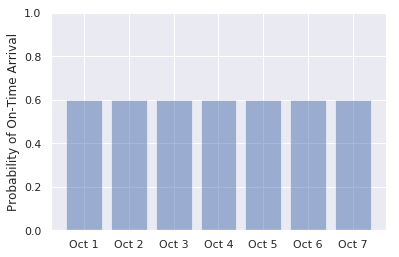

In [49]:
import numpy as np

labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')
values = (predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('3/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('4/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('5/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('6/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('7/10/2018 21:45:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))